In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [79]:
# importing data

qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)
rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv", index_col = 0)
wr = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv", index_col = 0)
te = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv", index_col = 0)

In [3]:
# lets focus on QBs first



qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,...,yds_alowed_2021,yds_alowed_2022,yds_per_opp_2019,yds_per_opp_2020,yds_per_opp_2021,yds_per_opp_2022,years_exp_2019,years_exp_2020,years_exp_2021,years_exp_2022
player_name,,,,,,,,,,,,,,,,,,,,,
AJ McCarron,346.0,326.0,306.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,...,6194.0,NaN,0.000000,0.000000,0.000000,NaN,5.0,6.0,7.0,NaN
Aaron Rodgers,320.0,358.0,375.0,107.0,57.0,89.0,67.0,92.0,36.0,37.0,...,5579.0,1517.0,6.804878,7.861947,7.454867,6.578125,14.0,15.0,16.0,17.0
Alex McGough,346.0,356.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0,2.0,NaN,NaN
Alex Smith,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,36.0,...,NaN,NaN,0.000000,6.049618,NaN,NaN,0.0,15.0,NaN,NaN
Alex Tanney,311.0,297.0,NaN,NaN,0.0,0.0,NaN,NaN,32.0,0.0,...,NaN,NaN,1.000000,0.000000,NaN,NaN,7.0,8.0,NaN,NaN


In [10]:
pd.set_option('display.max_columns', None)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_2019,pass_2020,pass_2021,pass_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent

In [14]:
qb['adp_2019']

player_name
AJ McCarron            0.0
Aaron Rodgers         57.0
Alex McGough           0.0
Alex Smith             0.0
Alex Tanney            0.0
                      ... 
Tyrod Taylor           0.0
Vincent Testaverde     0.0
Will Grier             0.0
Wilton Speight         0.0
Zach Wilson            NaN
Name: adp_2019, Length: 180, dtype: float64

### Initial modeling

Let's try models that don't need too much pre-processing like decision trees and then random forests.

2022 will be the testing year. 2019, 2020, and 2021 data will be used to train the model.

Is there a way to, perhaps, train a model on 2019 data to predict 2020 scores, save what it knows about that, then 2020 to predict 2021, then 2021 to 2022 and aggergate the model's knowledge of how one year will affect the next?

In [23]:
qb.shape

(180, 408)

In [32]:
# can we cut this data down to a relevant top percentile?

qb[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

,te_prem_pts_p5td_2019,te_prem_pts_p5td_2020,te_prem_pts_p5td_2021,te_prem_pts_p5td_2022
0.30,0.0000,0.000,0.000,0.0000
0.40,0.0000,1.280,0.520,7.2160
0.50,0.0000,9.520,11.390,17.7200
0.60,10.2800,20.160,32.324,40.9800
0.67,41.9736,56.132,70.806,62.2096
0.70,60.7460,71.340,88.054,97.7600
0.75,92.5300,141.020,151.095,131.4200
0.80,204.7600,186.720,201.268,181.5600


In [36]:
qb[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    50
te_prem_pts_p5td_2020    59
te_prem_pts_p5td_2021    62
te_prem_pts_p5td_2022    67
dtype: int64

Based on how many rows and then nulls, seems there are anywhere from 113 - 130 qbs per season that are in here.

We can definitely trim this down. Let's take, about the top 3rd -- that is, they have to be about in the top 3rd fantasy pts scored at least for one of these seasons to be eligible.

In [41]:
# let's filter out QBs a bit further

qb_filtered = qb.loc[(qb['te_prem_pts_p5td_2019'] >= 42 )| (qb['te_prem_pts_p5td_2020'] >= 56) | \
                     (qb['te_prem_pts_p5td_2021'] >= 71) |  (qb['te_prem_pts_p5td_2022'] >= 62) ]


In [43]:
qb_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    12
te_prem_pts_p5td_2020     9
te_prem_pts_p5td_2021     7
te_prem_pts_p5td_2022    11
dtype: int64

In [44]:
qb_filtered.shape

(66, 408)

In [55]:
nulls = {'te_prem_pts_pg_5ptd_2019': 0, 'te_prem_pts_pg_5ptd_2020': 0,'te_prem_pts_pg_5ptd_2021': 0,
                             'te_prem_pts_pg_5ptd_2022': 0 , 'te_prem_pts_p5td_2019': 0, 'te_prem_pts_p5td_2020': 0 ,
                             'te_prem_pts_p5td_2021': 0, 'te_prem_pts_p5td_2022': 0}

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

qb_filtered.loc[:, subset] = qb_filtered.loc[:, subset].fillna(0)

C:\Users\steph\AppData\Local\Temp/ipykernel_8988/567305817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered.loc[:, subset] = qb_filtered.loc[:, subset].fillna(0)


In [69]:
# Step 1: Data Preparation
# getting qb relevant stats
stats = ['adp', 'age', 'avg_intended_air_yards', 'ttl_turnover', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'team_wins', 'te_prem_pts_pg_5ptd']
target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train = qb_filtered[[f'{stat}_{previous_season}' for stat in stats]]
    y_train = qb_filtered[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test = qb_filtered[[f'{stat}_{current_season}' for stat in stats]]
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb_filtered[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...
Feature names seen at fit time, yet now missing:
- adp_2019
- age_2019
- avg_intended_air_yards_2019
- completion_percentage_above_expectation_2019
- epa_total_2019
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\AppData\Local\Temp/ipykernel_8988/27627865.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
C:\Users\steph\miniconda3

Metrics for 2020 season:
Mean Squared Error: 32.395862521053125
R-squared: 0.6212248652112724
--------------------


C:\Users\steph\AppData\Local\Temp/ipykernel_8988/27627865.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


Metrics for 2021 season:
Mean Squared Error: 24.461665051547467
R-squared: 0.6222882931850098
--------------------
Metrics for 2022 season:
Mean Squared Error: 13.694362893025957
R-squared: 0.795661322863876
--------------------


C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2022
- age_2022
- avg_intended_air_yards_2022
- completion_percentage_above_expectation_2022
- epa_total_2022
- ...
Feature names seen at fit time, yet now missing:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\AppData\Local\Temp/ipykernel_8988/27627865.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


In [72]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# Step 1: Data Preparation
# getting qb relevant stats
past_stats = ['avg_intended_air_yards', 'ttl_turnover', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'team_wins', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = qb_filtered[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = qb_filtered[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = qb_filtered[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = qb_filtered[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = qb_filtered[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb_filtered[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\AppData\Local\Temp/ipykernel_8988/589685551.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
C:\Users\steph\AppData\Local\Temp/ipykernel_8988/589685551.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


Metrics for 2020 season:
Mean Squared Error: 25.595665284471806
R-squared: 0.7007333401963765
--------------------
Metrics for 2021 season:
Mean Squared Error: 20.177396620723613
R-squared: 0.6884415308346148
--------------------
Metrics for 2022 season:
Mean Squared Error: 9.895153168350856
R-squared: 0.8523507428366855
--------------------


C:\Users\steph\AppData\Local\Temp/ipykernel_8988/589685551.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


Adding in current years experience and adp, it really helped make an even better predictor with R-squared of .852, MSE = 9.90.


In [73]:
pd.set_option('display.max_rows', None)

qb_filtered[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Aaron Rodgers,26.922500,25.964464,23.112500,19.557373,15.364706,15.013815
Alex Smith,9.697500,7.296958,0.000000,1.355296,0.000000,1.885919
Andy Dalton,13.672727,11.801732,11.025000,9.899306,13.588571,11.703920
Baker Mayfield,17.007500,19.089075,13.850000,16.130140,10.951667,9.956370
Ben Roethlisberger,19.748000,19.935660,14.756250,13.375036,0.000000,1.885919
Brock Purdy,0.000000,1.721927,0.000000,1.355296,13.251111,12.268982
C.J. Beathard,9.713333,8.487675,0.760000,6.613241,-0.250000,3.976532
Cam Newton,17.732000,16.135786,11.045000,13.323026,0.000000,1.885919
Carson Wentz,17.033333,16.892034,16.530588,14.368302,14.975000,13.186245


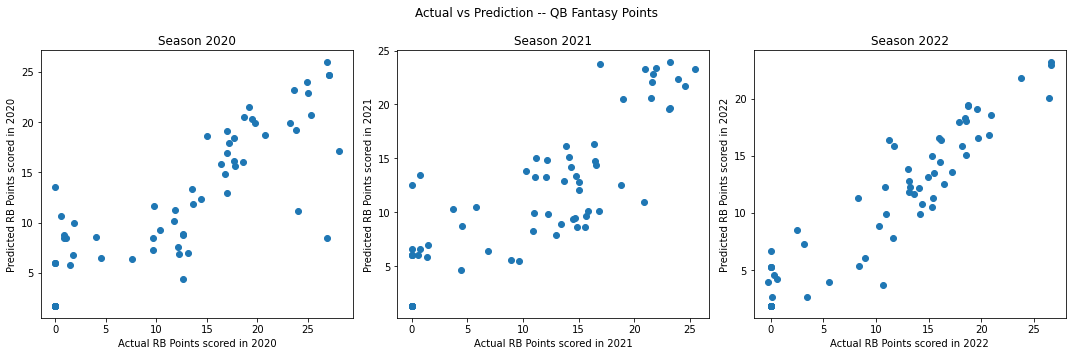

In [113]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- QB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(qb_filtered[f'te_prem_pts_pg_5ptd_{year}'], qb_filtered[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

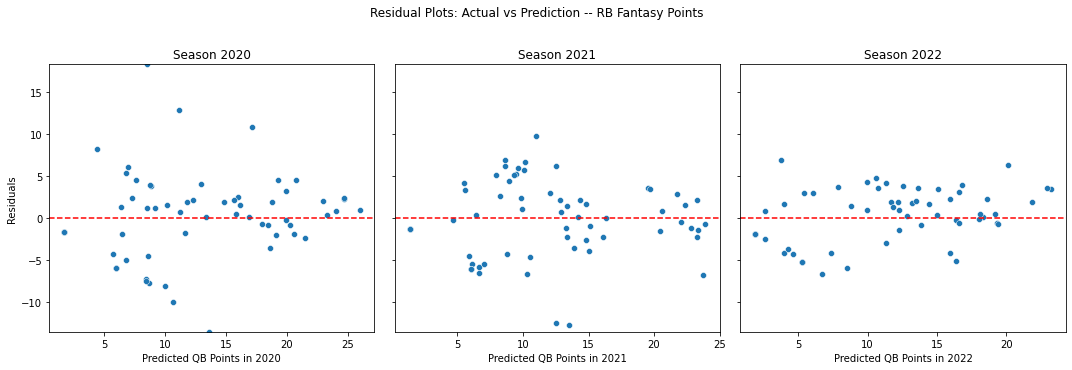

In [112]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = qb_filtered[f'te_prem_pts_pg_5ptd_{year}'] - qb_filtered[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = qb_filtered[f'te_prem_pts_pg_5ptd_{year}'] - qb_filtered[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=qb_filtered[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted QB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


This model is providing great results so far, and it gets stronger as there is more year by year data. Let's try this same thing with RBs.

### RB Initial Modeling

In [80]:
rb.shape

(391, 368)

<AxesSubplot:xlabel='te_prem_pts_p5td_2022'>

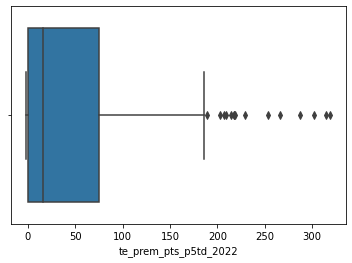

In [84]:
sns.boxplot(rb['te_prem_pts_p5td_2022'])

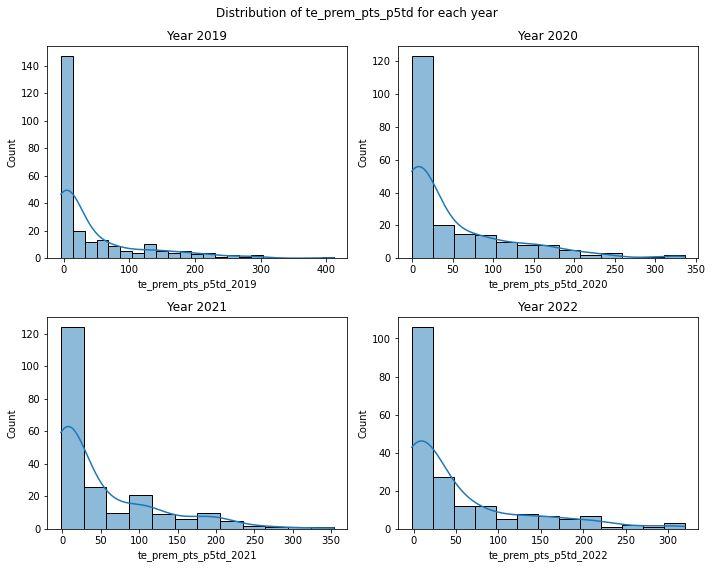

In [90]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of te_prem_pts_p5td for each year')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [85]:
# can we cut this data down to a relevant top percentile?

rb[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 
    'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].quantile([ .3, .4, .5, .6, .67,.7, .75, .8])

,te_prem_pts_p5td_2019,te_prem_pts_p5td_2020,te_prem_pts_p5td_2021,te_prem_pts_p5td_2022
0.30,0.000,1.40,1.250,1.450
0.40,0.560,7.20,6.000,7.000
0.50,5.600,15.70,16.600,16.500
0.60,15.560,29.70,33.600,34.000
0.67,31.947,48.68,49.334,44.030
0.70,44.740,60.20,59.200,53.650
0.75,57.875,78.30,90.000,75.425
0.80,82.100,94.60,102.200,95.600


In [89]:
# let's filter out QBs a bit further
# cut it about the top 3rd, or 67th percentile
# rb must register a season in the top 3rd of the league to be in final dataset

rb_filtered = rb.loc[(rb['te_prem_pts_p5td_2019'] >= 31.95 )| (rb['te_prem_pts_p5td_2020'] >= 48.68) | \
                     (rb['te_prem_pts_p5td_2021'] >= 49.33) |  (rb['te_prem_pts_p5td_2022'] >= 44.03) ]

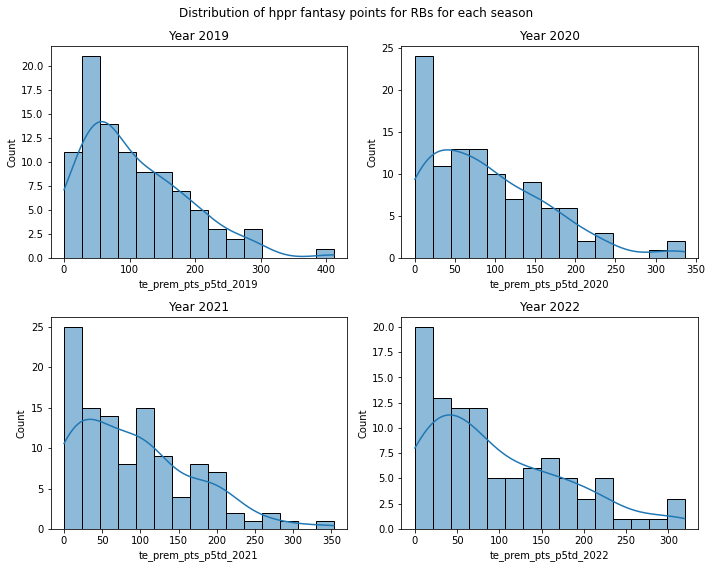

In [94]:
# plotting all years histogram
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of hppr fantasy points for RBs for each season')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb_filtered[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True, bins = 15)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [95]:
rb_filtered[['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']].isna().sum()

te_prem_pts_p5td_2019    34
te_prem_pts_p5td_2020    23
te_prem_pts_p5td_2021    18
te_prem_pts_p5td_2022    31
dtype: int64

In [97]:
# filling nulls similarly as before

rb_filtered.loc[:, subset] = rb_filtered.loc[:, subset].fillna(0)

C:\Users\steph\AppData\Local\Temp/ipykernel_8988/4064494341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_filtered.loc[:, subset] = rb_filtered.loc[:, subset].fillna(0)


### RB Model

In [103]:
# using 'current' season features (like, age or experience, and adp)

# Step 1: Data Preparation
# getting qb relevant stats
past_stats = ['ttl_opp', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp']


target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = rb_filtered[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = rb_filtered[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    y_train = rb_filtered[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test_p = rb_filtered[[f'{stat}_{current_season}' for stat in past_stats]]
    X_test_c = rb_filtered[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
    
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    rb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = rb_filtered[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\AppData\Local\Temp/ipykernel_8988/2698531490.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred
C:\Users\steph\AppData\Local\Temp/ipykernel_8988/2698531490.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


Metrics for 2020 season:
Mean Squared Error: 8.551285439529064
R-squared: 0.7363167538780421
--------------------
Metrics for 2021 season:
Mean Squared Error: 5.918530886333184
R-squared: 0.79565821613319
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.798885650258114
R-squared: 0.8598078499101602
--------------------


C:\Users\steph\AppData\Local\Temp/ipykernel_8988/2698531490.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_filtered[f'fantasypoints_pg_{current_season}'] = y_pred


In [104]:
rb_filtered[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Aaron Jones,16.814286,12.578372,13.533333,14.019448,12.770588,13.960755
Adrian Peterson,7.406250,5.545435,6.150000,3.223881,0.000000,0.131992
Alex Collins,6.866667,5.358321,5.845455,3.543502,0.000000,0.131992
Alexander Mattison,6.184615,7.160903,6.868750,6.821852,4.758824,7.177273
Alvin Kamara,22.420000,14.956836,16.246154,15.582689,12.213333,12.096494
Ameer Abdullah,1.625000,5.045277,4.147059,5.860731,2.447059,3.864243
Antonio Gibson,13.157143,7.986655,12.881250,15.699042,9.526667,9.138863
Austin Ekeler,13.830000,10.532775,19.050000,14.381911,18.776471,10.426164
Benny Snell,0.000000,1.500342,0.000000,0.055980,0.000000,0.014654


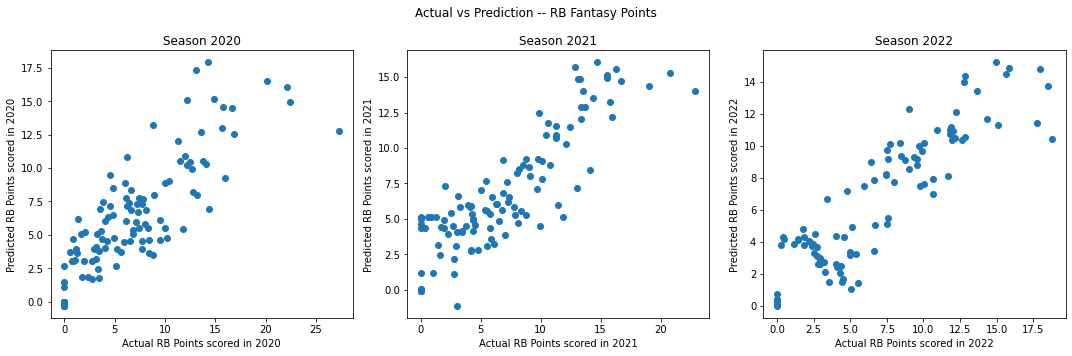

In [114]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- RB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(rb_filtered[f'te_prem_pts_pg_5ptd_{year}'], rb_filtered[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

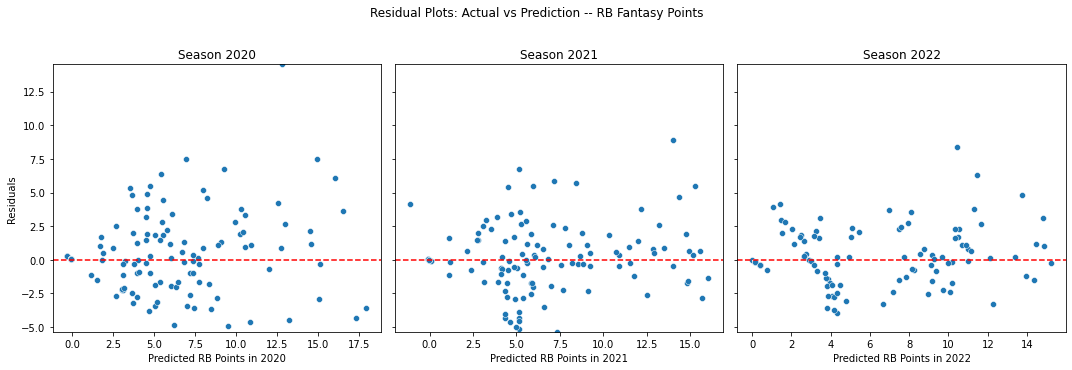

In [111]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = rb_filtered[f'te_prem_pts_pg_5ptd_{year}'] - rb_filtered[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = rb_filtered[f'te_prem_pts_pg_5ptd_{year}'] - rb_filtered[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=rb_filtered[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted RB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [10]:
pd.set_option('display.max_columns', None)

rb.fillna(0, inplace = True)

rb.head()

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,team,player_name_x,position,height,weight,years_exp,rookie_year,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,rookie_year_22,tm_22,pos_22,fantasypoints_22,pts/g,gp,cmp,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,rushingtd_22,fumbles_22,tgt_22,rec_22,receivingyds_22,receivingtd_22,season_19_x,player_display_name,season_20_x,season_x,avg_intended_air_yards,season_22_x,player_gsis_id,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,pct_gs19,pct_gs20,pct_gs21,avg_per_rush19,avg_per_rush20,avg_per_rush21,avg_per_catch19,avg_per_catch20,avg_per_catch21,avg_per_tgt19,avg_per_tgt20,avg_per_tgt21,ttl_touch19,ttl_touch20,ttl_touch21,ttl_opp19,ttl_opp20,ttl_opp21,ttl_opp_per_game19,ttl_opp_per_game20,ttl_opp_per_game21,yds_per_opp19,yds_per_opp20,yds_per_opp21,td_per_opp19,td_per_opp20,td_per_opp21,turnover_per_opp19,turnover_per_opp20,turnover_per_opp21,fp_per_opp19,fp_per_opp20,fp_per_opp21,fp_per_gm19,fp_per_gm20,fp_per_gm21,rookie19,rookie20,rookie21,fantasypoints_19hppr,fantasypoints_20hppr,fantasypoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr,avg_per_rush22,avg_per_catch22,avg_per_tgt22,ttl_touch22,ttl_opp22,ttl_opp_per_game22,yds_per_opp22,td_per_opp22,turnover_per_opp22,fp_per_opp22,fp_per_gm22,rookie22,fantasypoints_22hppr,fp_per_gm22hppr
2,ARI,Alfred Morris,RB,00-0029141,70.0,222.0,7.0,ARI,RB,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.4,0.0,0.0,0.0,NYG,Alfred Morris,RB,70.0,224.0,8.0,NYG,RB,32.0,9.0,0.0,4.0,3.0,0.0,0.0,0.0,238.0,1.0,55.0,19.0,1.0,38.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

For some initial modeling, let's use FantasyPoints of prev. 2 seasons; total opps prev. 2 seasons; fp_per_game; years_exp

In [233]:
rb_small = rb[['player_id_x', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'avg_per_rush20', 
               'avg_per_catch20', 'fp_per_gm21hppr']]

rb_X = rb_small.set_index('player_id')

rb_target = rb_small['fp_per_gm21hppr']


In [234]:
rb_target = rb_target.fillna(0)

In [235]:
rb_X = rb_X.fillna(0)

rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


In [236]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000


In [237]:
# splitting into train and test

rb_x_train, rb_x_test, rb_y_train, rb_y_test = train_test_split(rb_X, rb_target, test_size = .25, random_state = 0)



Decision trees don't need much pre-processing, so let's try modeling with one first

In [238]:
# decision tree regressor

dt_reg = tree.DecisionTreeRegressor(random_state = 0)

dt_reg = dt_reg.fit(rb_x_train, rb_y_train)


In [239]:
dt_pred_train = dt_reg.predict(rb_x_train)
dt_pred_test = dt_reg.predict(rb_x_test)

dt_pred_test

array([ 2.        ,  5.35714286,  2.        , 11.32142857,  6.        ,
        3.        ,  5.86363636,  6.875     ,  6.82142857,  2.26923077,
        8.66666667, 10.14705882,  3.75      , 20.76470588,  2.91666667,
        6.        , 10.14705882,  0.28571429, 12.375     , 10.14705882,
       13.69230769,  0.80769231,  2.91666667,  5.78125   ,  4.41666667,
        3.47058824,  5.        , 13.53333333, 12.375     ,  0.75      ,
        0.875     ,  0.80769231,  2.22222222])

In [240]:
values = ['Decision Tree', np.sqrt(mean_squared_error(rb_y_train, dt_pred_train)),
         np.sqrt(mean_squared_error(rb_y_test, dt_pred_test))]

values = pd.DataFrame([values], columns = ['Model Type', 'Train Error', 'Test Error'])

values

,Model Type,Train Error,Test Error
0,Decision Tree,0.0,0.465304


In [241]:
# Visualizing DT
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere

import graphviz

dot_tree = tree.export_graphviz(dt_reg, out_file ='tree.dot')

In [242]:
graph = graphviz.Source(dot_tree)

In [243]:
# graph

### Pre-Processing for other modeling

In [244]:
rb_trans.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250,0.956624,0.606831,0.390601,0.521965,0.590013
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553,0.558539,0.959658,0.043812,0.851055,0.722386
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461,0.392850,0.056403,0.968649,0.082918,0.064608
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317,0.502173,0.874711,0.052351,0.962985,0.704128
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512,0.290250,0.568873,-0.076044,0.531948,0.436311
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934,0.148382,0.370003,-0.070054,0.293942,0.187776
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000,0.533245,0.729905,0.044177,0.701455,0.969194
fpg19_trans,0.956624,0.558539,0.392850,0.502173,0.290250,0.148382,0.533245,1.000000,0.559611,0.455172,0.517643,0.553370
fpg20_trans,0.606831,0.959658,0.056403,0.874711,0.568873,0.370003,0.729905,0.559611,1.000000,0.060276,0.911293,0.728101
ye21_trans,0.390601,0.043812,0.968649,0.052351,-0.076044,-0.070054,0.044177,0.455172,0.060276,1.000000,0.078007,0.077190


In [245]:
rb_X.describe()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,6.233781,5.943615,3.751938,95.643411,3.592165,6.487472,5.991770
std,7.066929,5.699271,2.304991,95.060080,1.644691,3.670383,5.163123
min,-1.000000,0.000000,1.000000,0.000000,-1.000000,-3.000000,-0.166667
25%,0.000000,1.000000,2.000000,13.000000,3.176471,5.000000,1.772727
50%,3.693333,4.545455,3.000000,69.000000,4.148515,6.800000,4.437500
75%,10.762500,8.769231,5.000000,159.000000,4.570175,8.305556,9.566667
max,32.950000,27.166667,14.000000,409.000000,6.500000,27.000000,23.000000


In [246]:
# if i need to take out negatives
# rb_X = rb_X[(rb_X[rb_X.columns] >= 0).all(axis = 1)]

In [247]:
rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


<AxesSubplot:>

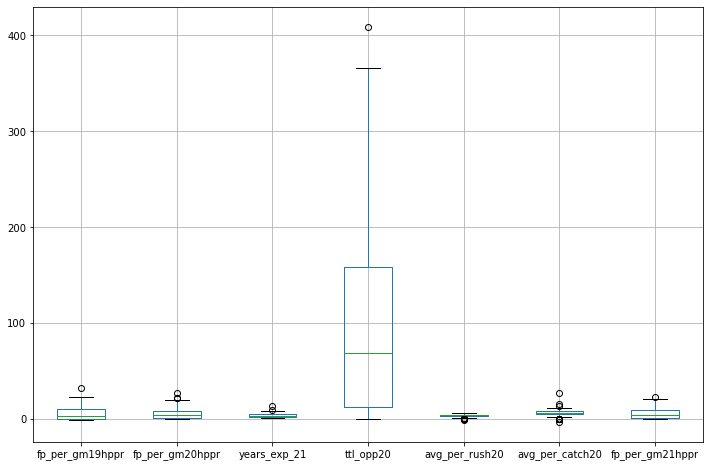

In [248]:
plt.figure(figsize = (12,8))
rb_X.boxplot()

In [249]:
# fp_gm19_box = stats.boxcox(rb_X['fp_per_gm19hppr'])

In [250]:
sc = StandardScaler()

rb_trans = sc.fit_transform(rb_X)

rb_trans = pd.DataFrame(rb_trans, columns = rb_X.columns)

rb_trans.head()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
0,0.857371,1.353038,0.979104,1.028151,0.676624,0.828111,-0.192836
1,1.521287,1.060931,0.543572,1.841323,0.246383,-0.275557,0.260849
2,0.084806,0.510845,-0.327493,0.721892,0.626496,0.300163,0.803650
3,-0.762565,-1.046939,1.850169,-0.999498,-2.192612,-1.774410,-1.165018
4,1.418804,0.098004,1.414637,-0.334176,-0.248416,0.491843,0.414777


<AxesSubplot:>

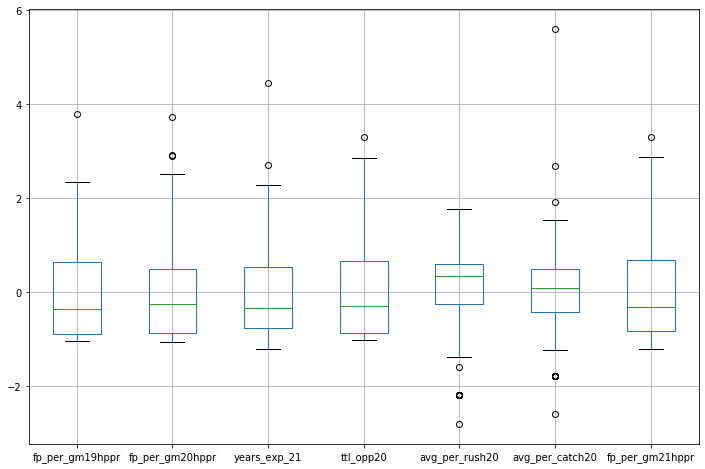

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

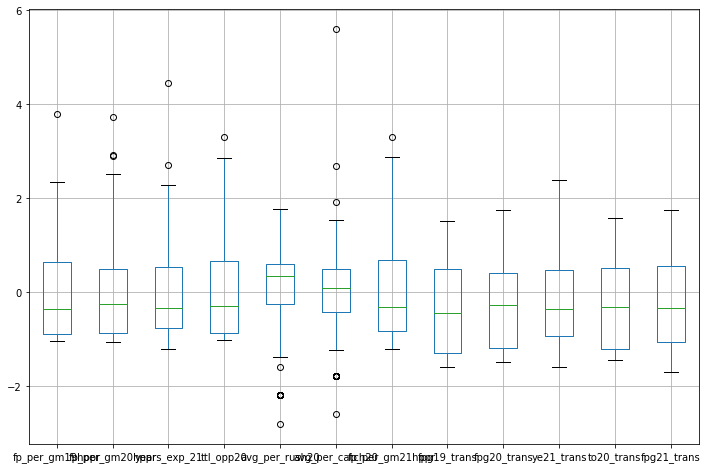

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
